## BUSINESS UNDERSTANDING

The aim of this project is to develop a model that predicts sepsis in patients based on clinical measurements.
Early prediction can significantly improve patient outcomes by enabling prompt treatment, thus reducing mortality rates. 
This model can assist healthcare professionals in identifying high-risk patients and improving the efficiency of healthcare delivery.

Dataset column description:

ID: number to represent patient ID

PRG: Plasma glucose

PL: Blood Work Result-1 (mu U/ml)

PR: Blood Pressure (mm Hg)

SK: Blood Work Result-2 (mm)

TS: Blood Work Result-3 (mu U/ml)

M11: Body mass index (weight in kg/(height in m)^2

BD2: Blood Work Result-4 (mu U/ml)

Age: patients age (years)

Insurance: If a patient holds a valid insurance card

Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwis

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


## DATA UNDERSTANDING

In [2]:

data = pd.read_csv(r'C:\Users\Dell\Career_Accelerator_P5-ML_API\Datasets\Paitients_Files_Train.csv')  # Correct typo in filename if necessary
display(data.head())


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [3]:
data.info()  # Overview of data types and missing values
data.describe()  # Statistical summary


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Key Observations:
1. There are no missing values in the dataset
2. Insurance column has datatype, int. We will change that to Boolean.
3. The target column (spessis) has datatype object. We will change that to Boolean.

In [ ]:
#changing insurance column to bool datatype
data['Insurance'] = data['Insurance'].astype(bool)


# Convert the target to boolean: 'Positive' -> True, 'Negative' -> False
data['Sepssis'] = data['Sepssis'].apply(lambda x: True if x.strip().lower() == 'positive' else False)

data.info() 

# Check class distribution after target conversion
#print("Class distribution after converting 'Sepssis' to boolean:")
#print(data['Sepssis'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    bool   
 10  Sepssis    599 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(1)
memory usage: 43.4+ KB
Class distribution after converting 'Sepssis' to boolean:
Sepssis
False    391
True     208
Name: count, dtype: int64


## EXPLORATORY DATA ANALYSIS & DATA CLEANING

I. UNIVARIATE ANALYSIS

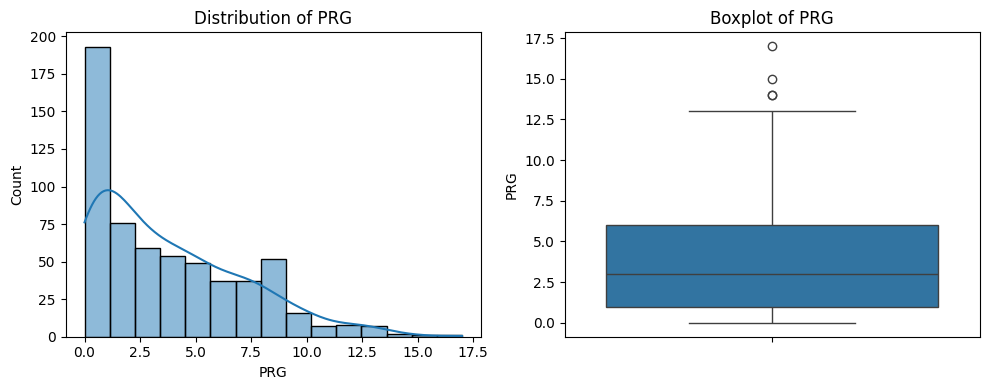

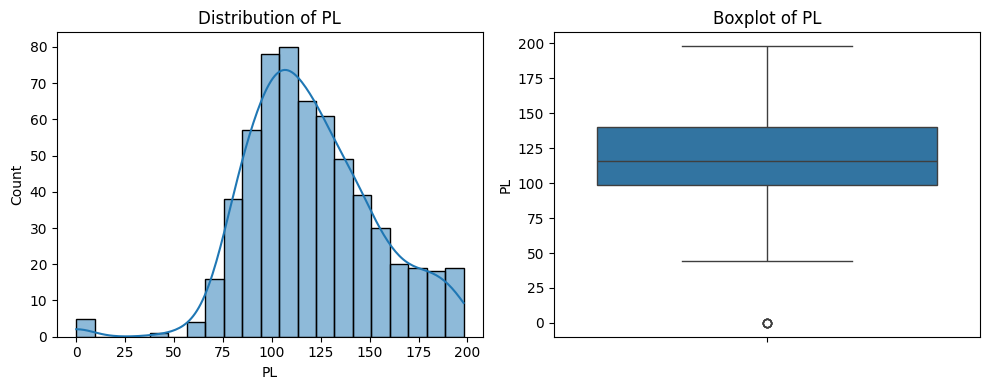

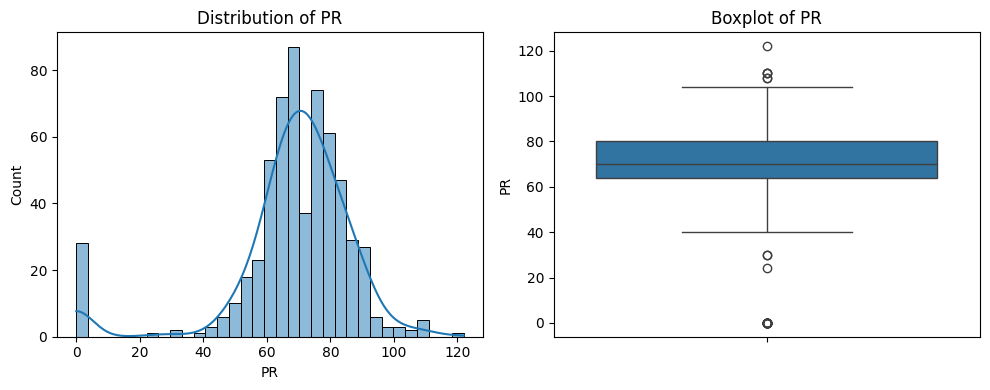

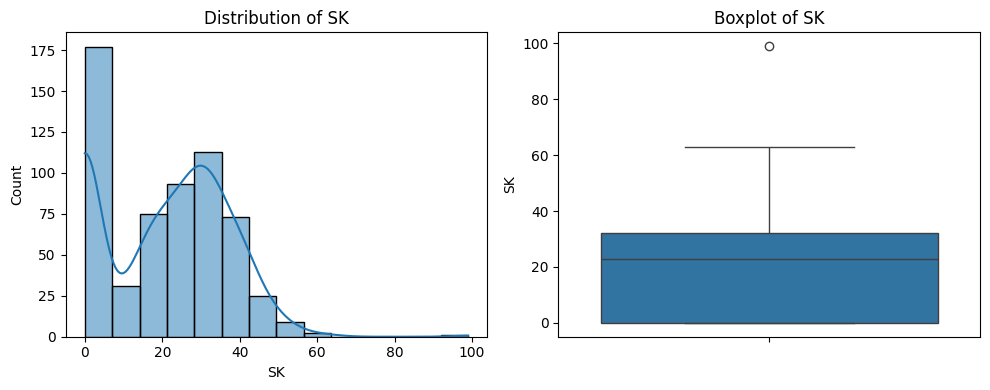

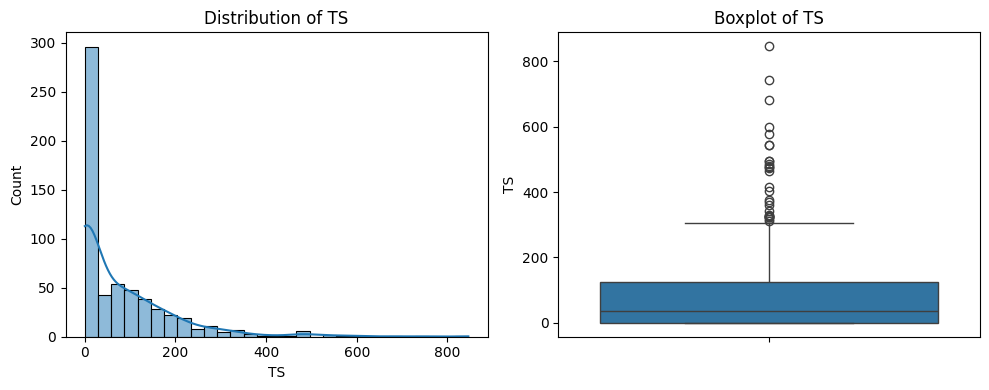

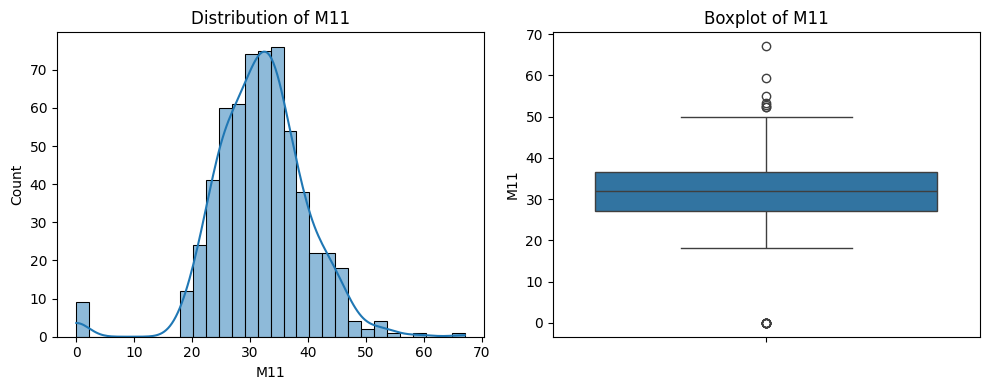

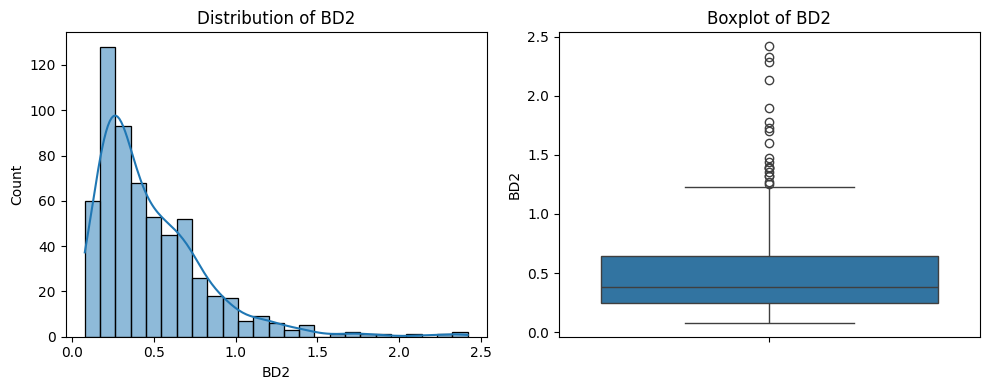

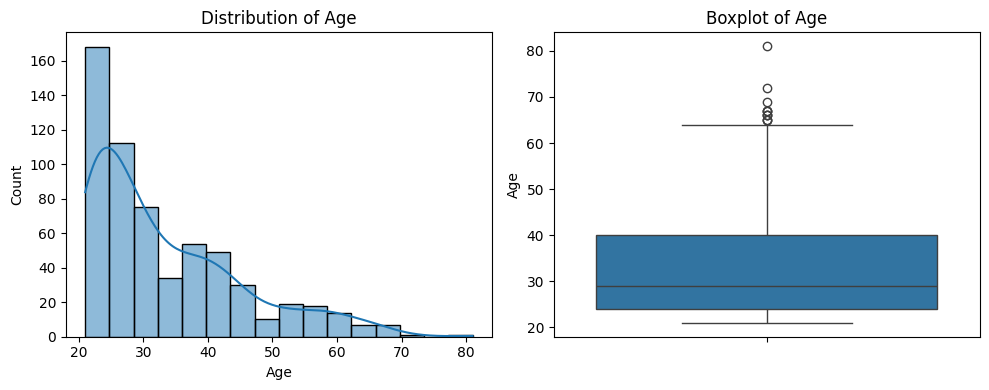

In [5]:

columns = data.select_dtypes(include=['number']).columns

for column in columns:
    plt.figure(figsize=(10, 4))
    
    # Histogram to check distribution
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    
    # Boxplot to identify outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()


#### Key Insights:




II. BIVARIATE ANALYSIS

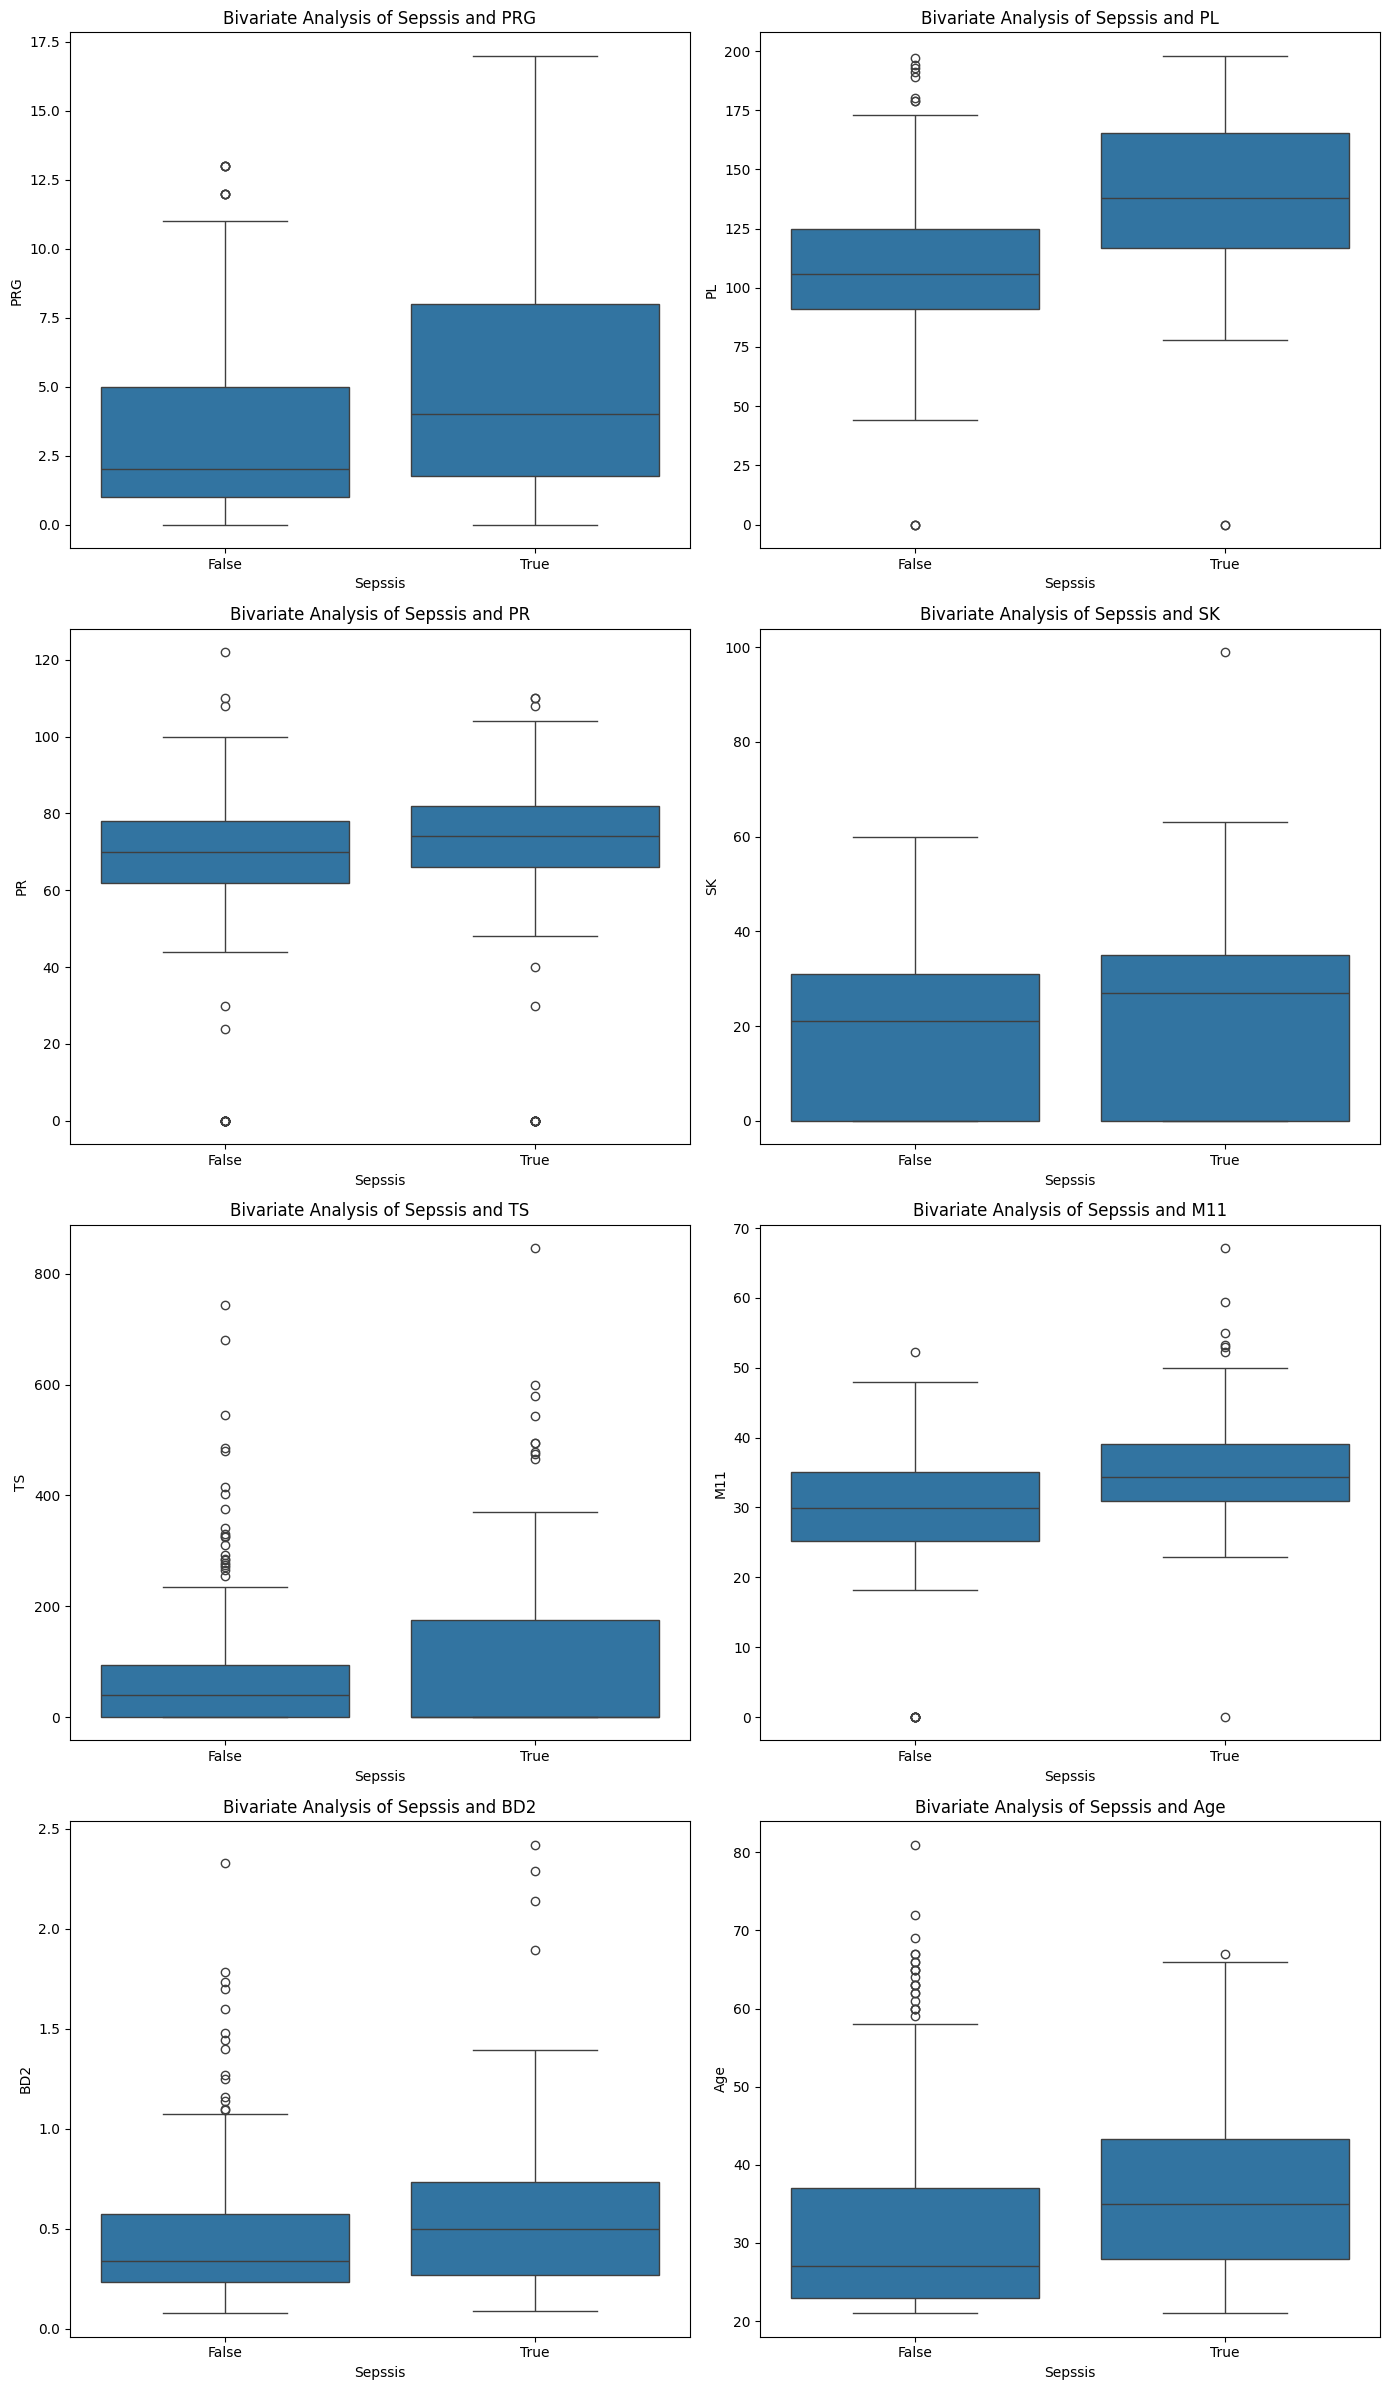

In [6]:
# Boxplot to check distribution of features against Sepsis (target column)
# Columns of features to analyze
columns = data.select_dtypes(include=['number']).columns

# Create subplots
fig, axes = plt.subplots(nrows=len(columns) // 2 + len(columns) % 2, ncols=2, figsize=(14, len(columns) * 3))
axes = axes.flatten()

# Plot each feature in a separate subplot
for i, column in enumerate(columns):
    sns.boxplot(x='Sepssis', y=column, data=data, ax=axes[i])
    axes[i].set_title(f'Bivariate Analysis of Sepssis and {column}')

# Hide any extra axes if the number of columns is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


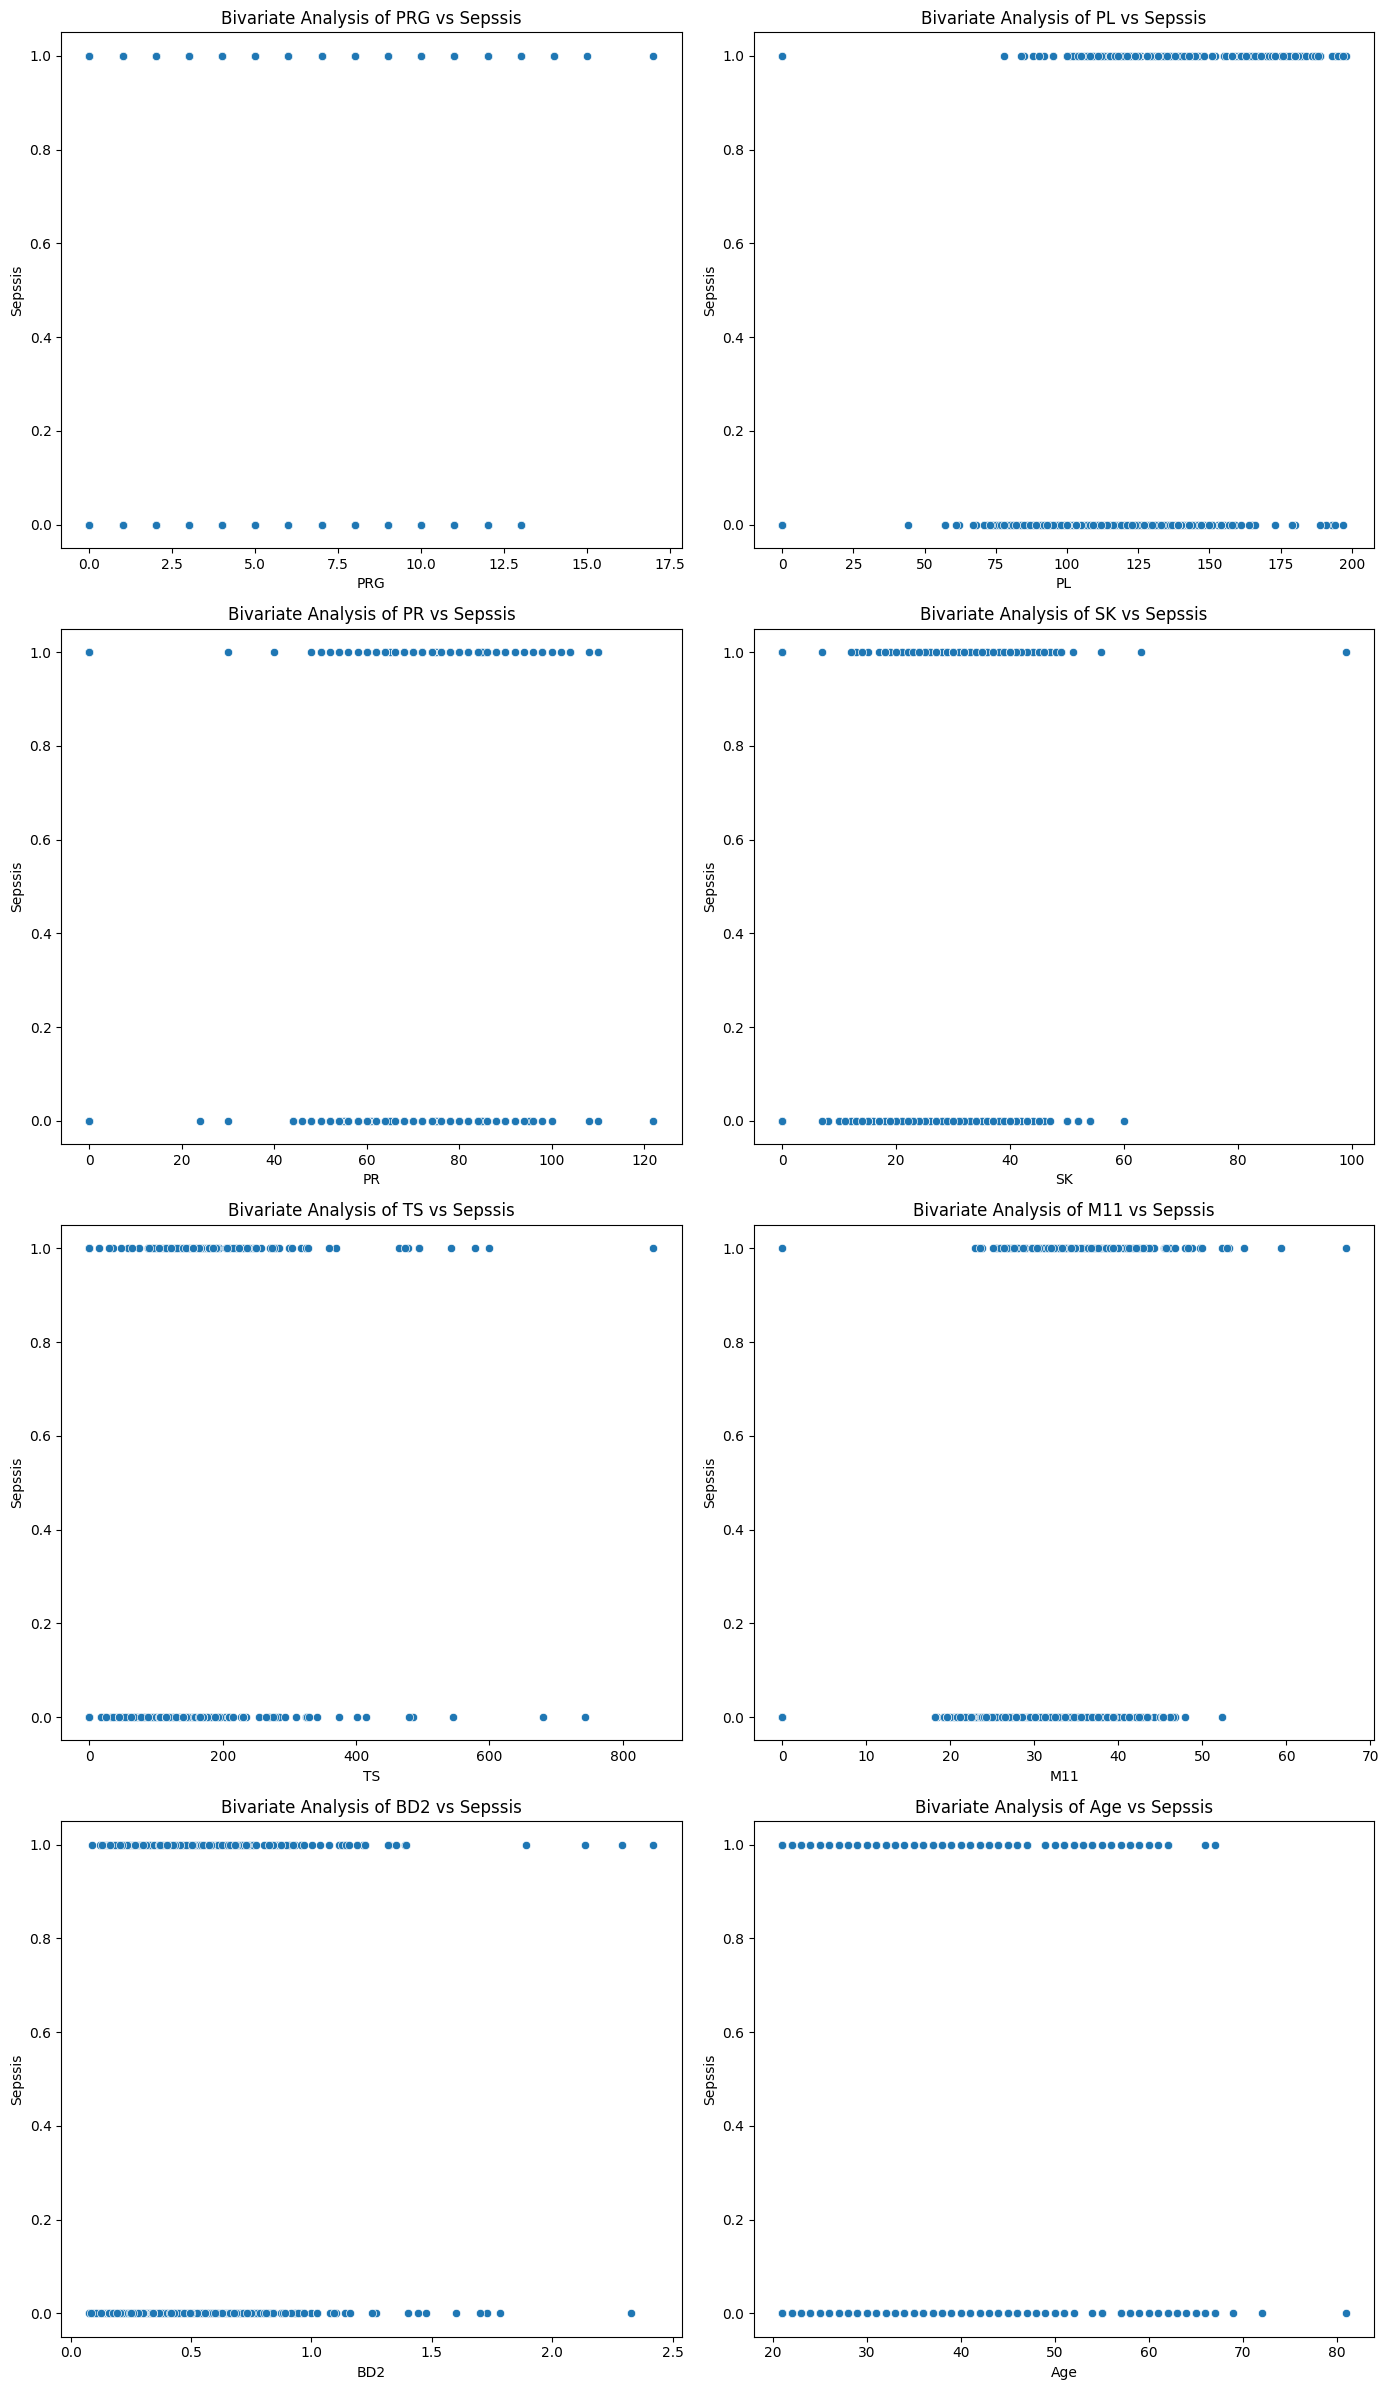

In [7]:
# Create subplots for scatterplots
fig, axes = plt.subplots(nrows=len(columns) // 2 + len(columns) % 2, ncols=2, figsize=(14, len(columns) * 3))
axes = axes.flatten()

# Scatterplots to analyze relationships between numerical features and the target
for i, column in enumerate(columns):
    sns.scatterplot(x=column, y='Sepssis', data=data, ax=axes[i])
    axes[i].set_title(f'Bivariate Analysis of {column} vs Sepssis')

# Hide any extra axes if the number of columns is odd
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


##### Key Insights

III. MULTIVARIATE ANALYSIS

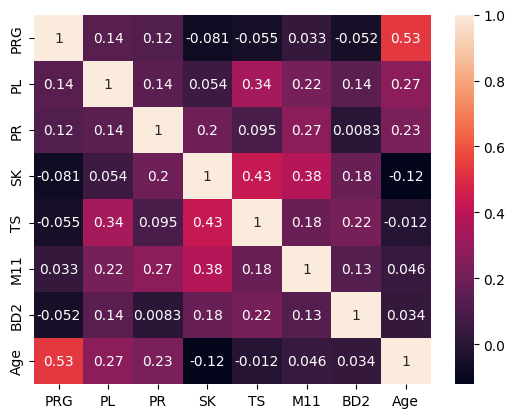

In [8]:
numeric_data = data.select_dtypes(include=['number'])
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()


From the correlation heatmap, we can derive these key insights:

i. Age and PRG Correlation: There is a moderately strong positive correlation (0.53) between Age and PRG, indicating that higher age might be associated with higher PRG values.

ii. PL and TS: The PL has a notable correlation (0.34) with TS, which suggests these features might be related in terms of patient outcomes or measurements.

iii. Weak Correlations: Most other features show weak correlations, implying less linear relationship, which might suggest their independent influence on the target variable.

# DATA PREPROCESSING

In [10]:
from sklearn.model_selection import train_test_split

# Select features and target
X = data[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']]
y = data['Sepssis']

# Split the data into training and validation sets using stratified sampling
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Verify class distribution in training and validation sets
#print("\nClass distribution in training set:")
#print(y_train.value_counts())

#print("\nClass distribution in validation set:")
#print(y_val.value_counts())


In [11]:
from sklearn.preprocessing import StandardScaler

# Fit the scaler to the training data and transform both training and validation sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


# BUILDING THE MODEL

In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train multiple models
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

best_model = None
best_model_name = ""
best_metrics = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val_scaled)
    
    # Evaluate the model
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=1)
    recall = recall_score(y_val, y_pred, zero_division=1)
    f1 = f1_score(y_val, y_pred, zero_division=1)
    
    print(f"{model_name} Metrics: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1={f1:.4f}")
    
    # Track the best model based on F1 score
    if not best_model or f1 > best_metrics.get("F1", 0):
        best_model = model
        best_model_name = model_name
        best_metrics = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1": f1
        }

# Print the best model and its metrics
print(f"\nBest Model: {best_model_name}")
print(f"Metrics: Accuracy={best_metrics['Accuracy']:.4f}, Precision={best_metrics['Precision']:.4f}, Recall={best_metrics['Recall']:.4f}, F1={best_metrics['F1']:.4f}")

# Ensemble (Voting Classifier) - Optional
voting_classifier = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42))
], voting='hard')

voting_classifier.fit(X_train_scaled, y_train)

# Evaluate the Voting Classifier
y_pred_voting = voting_classifier.predict(X_val_scaled)
voting_f1 = f1_score(y_val, y_pred_voting, zero_division=1)

if voting_f1 > best_metrics['F1']:
    best_model = voting_classifier
    best_model_name = "Voting Classifier"
    best_metrics = {
        "Accuracy": accuracy_score(y_val, y_pred_voting),
        "Precision": precision_score(y_val, y_pred_voting, zero_division=1),
        "Recall": recall_score(y_val, y_pred_voting, zero_division=1),
        "F1": voting_f1
    }
    print("\nVoting Classifier is the new best model.")

# Display the best model metrics
print(f"\nFinal Best Model: {best_model_name}")
print(f"Metrics: Accuracy={best_metrics['Accuracy']:.4f}, Precision={best_metrics['Precision']:.4f}, Recall={best_metrics['Recall']:.4f}, F1={best_metrics['F1']:.4f}")


RandomForest Metrics: Accuracy=0.7556, Precision=0.6727, Recall=0.5873, F1=0.6271
LogisticRegression Metrics: Accuracy=0.7889, Precision=0.7273, Recall=0.6349, F1=0.6780
GradientBoosting Metrics: Accuracy=0.7722, Precision=0.7200, Recall=0.5714, F1=0.6372

Best Model: LogisticRegression
Metrics: Accuracy=0.7889, Precision=0.7273, Recall=0.6349, F1=0.6780

Final Best Model: LogisticRegression
Metrics: Accuracy=0.7889, Precision=0.7273, Recall=0.6349, F1=0.6780


In [15]:
# Make predictions using the best model
# Load the test dataset
test_data = pd.read_csv(r'C:\Users\Dell\Career_Accelerator_P5-ML_API\Datasets\Paitients_Files_Test.csv')

# Extract features from the test set
X_test = test_data[['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance']]

# Convert the features appropriately, if needed
# Assuming 'Insurance' is boolean type in the test set as well


# Transform the test data using the trained scaler
X_test_scaled = scaler.transform(X_test)



y_test_pred = best_model.predict(X_test_scaled)

# Convert predictions to 'Positive' or 'Negative'
predictions = ['Positive' if label == 1 else 'Negative' for label in y_test_pred]

# Print out some sample predictions
print("Sample Predictions on Test Data:")
for i in range(10):  # Display first 10 predictions
    print(f"Test Sample {i + 1}: {predictions[i]}")


Sample Predictions on Test Data:
Test Sample 1: Negative
Test Sample 2: Negative
Test Sample 3: Negative
Test Sample 4: Negative
Test Sample 5: Positive
Test Sample 6: Positive
Test Sample 7: Negative
Test Sample 8: Positive
Test Sample 9: Negative
Test Sample 10: Positive


In [16]:
import pickle

# Save the best model and the scaler
key_components = {
    'model': best_model,
    'scaler': scaler
}

with open('ml_components.pkl', 'wb') as file:
    pickle.dump(key_components, file)

print(f"\nBest model ({best_model_name}) and scaler saved successfully.")



Best model (LogisticRegression) and scaler saved successfully.
